# Modeling and Simulation in Python

## Orbital Mechanics Homework 

Chapter 20

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

Jinfay Yuan, Completed with Annie Chu


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import numpy as math

In [19]:
# Units

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [20]:
# Initial State Variables 

r_0 = 147e9 * m 

init = State(x = r_0,
             y = 0 * m,
             vx = 0 * m / s,
             vy = -30330 * m / s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30330.0 meter / second


In [21]:
# System Variables

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end= 3.154e7 * s) #a year in seconds

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31540000.0 second


In [22]:
# Function returning force of gravity imparted onto Earth by Sun

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """ 
    x, y, vx, vy = state
    unpack(system)
    
    pos = Vector(x,y)
    r = pos.mag
    force = G * m1 * m2 / r**2
    return Vector(force*np.cos(pos.angle), force*np.sin(pos.angle))

In [23]:
# Test
universal_gravitation(init, system)


<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [24]:
# Slope Function that returns change in position and acceleration

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    force = -universal_gravitation(state,system) 
    dxdt = vx
    dydt = vy
    ax = force.x/ m2
    ay = force.y/ m2
    return dxdt, dydt, ax, ay

In [25]:
# Test

dxdt, dydt, ax, ay = slope_func(init, 0, system)
print(dxdt)
print(dydt)
print(ax)
print(ay)
slope_func(init, 0, system)

0.0 meter / second
-30330.0 meter / second
-0.006143082049146188 newton / kilogram
-0.0 newton / kilogram


(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [26]:
# Event function that tells simulation to end after 1 year
def event_func(state, t, system):
    unpack(system)
    return t - t_end

In [33]:
# Run simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[31540000.0]]
nfev,152
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [34]:
# Confirms that the simulation ended after 1 year

t_final = get_last_label(results) * s
t_final.to(UNITS.day)

<Quantity(365.04629629629625, 'day')>

In [35]:
ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, method='RK23', t_eval=ts)

In [36]:
# Converts time step to days

results.index /= 60 * 60 * 24

In [37]:
# Converts distance to millions of km

x = results.x / 1e9;
y = results.y / 1e9;

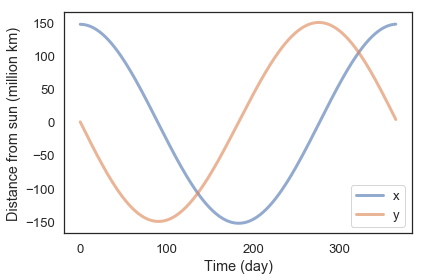

In [38]:
# Plots distance from sun (x,y) vs. time 

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

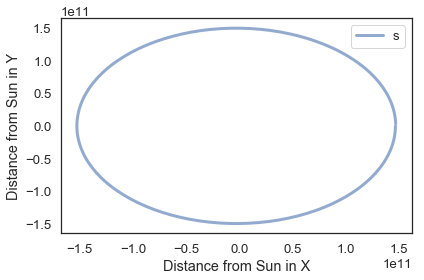

In [40]:
# Plots distance from Sun in Y direction vs. X direction 

plot(results.x, results.y, label='s')
decorate(xlabel = 'Distance from Sun in X',
         ylabel = 'Distance from Sun in Y')